# **Import Dataset**

In [ ]:
!pip install geopy

In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
import numpy as np

# Library for Data Visualization.
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
import matplotlib.ticker as ticker
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)

In [ ]:
df = pd.read_excel("/content/jobstreetfixxx_new22.xlsx")
df.head()

,job_id,job_title,company,location,category,subcategory,type,salary
0,76283354,Data Analyst,PT Dinus Cipta Mandiri,West Jakarta,Science & Technology,"Mathematics, Statistics & Information Sciences",Contract/Temp,Rp 6.000.000 – Rp 8.000.000 per month
1,76283627,Data Collector,Diana Flat Glass Processing,Makassar,Information & Communication Technology,Database Development & Administration,Contract/Temp,"IDR 3,500,000 - 3,750,000"
2,76119041,Data Analyst,Grinnliving Indonesia,Tangerang,Information & Communication Technology,Business/Systems Analysts,Full time,"Rp 5,000,000 – Rp 7,000,000 per month"
3,76188794,Data Analyst Staff,PT Magna Hardware,Central Jakarta,Information & Communication Technology,Database Development & Administration,Full time,Rp 5.067.381 – Rp 6.000.000 per month
4,76191470,Data Finance Supply Chain Cost Analyst Controller,PT GREENLY LIFESTYLE INDONESIA,Surabaya,Accounting,Analysis & Reporting,Full time,"Rp 4,000,000 – Rp 6,000,000 per month"


In [ ]:
top_10_counts = df['job_title'].value_counts().head(10)
print(top_10_counts)

job_title
Accounting Staff          10
Data Analyst               6
Data Engineer              6
Accounting                 6
Accounting & Tax Staff     5
Accounting Manager         5
Staff Accounting           5
IT Business Analyst        4
Business Analyst           4
Accounting & Tax           4
Name: count, dtype: int64


# Data Preprocessing


## Data Cleaning

### Duplicate Handling

In [ ]:
duplicate_rows_data = df[df.duplicated()]
print("Jumlah baris yang terduplikat: ", duplicate_rows_data.shape[0])
print("Baris yang terduplikat:")
print(duplicate_rows_data)

Jumlah baris yang terduplikat:  0
Baris yang terduplikat:
Empty DataFrame
Columns: [job_id, job_title, company, location, category, subcategory, type, salary]
Index: []


Tidak terdapat data yang memiliki duplicate.

### Missing Value Handling


In [ ]:
rows_with_missing_data = df[df.isnull().any(axis=1)]
num_rows_with_missing_data = rows_with_missing_data.shape[0]

print("\nRows with missing data:")
print(rows_with_missing_data)

print("\nNumber of rows with missing data:", num_rows_with_missing_data)


Rows with missing data:
Empty DataFrame
Columns: [job_id, job_title, company, location, category, subcategory, type, salary]
Index: []

Number of rows with missing data: 0


Tidak terdapat data yang mengalami missing value.

## Data Transformation

In [ ]:
pd.set_option('display.max_colwidth', None)
table = []
df_2 = df.drop(['job_id'], axis = 1)
for column in df_2.columns:
    unique_values = df_2[column].unique()
    table.append([f"Nilai unik untuk kolom '{column}':", list(unique_values)])

df_unique = pd.DataFrame(table, columns=['Kolom', 'Nilai Unik'])
df_unique

,Kolom,Nilai Unik
0,Nilai unik untuk kolom 'job_title':,"[Data Analyst, Data Collector, Data Analyst Staff, Data Finance Supply Chain Cost Analyst Controller, Data Analytics (Business Analyst) Jakarta - Pharmacy Company (ID 611169), Operations Improvement Analyst, DATA ANALYST, Business Analyst, Accounting Data Entry Clerk, Finance Analyst & Cost Control, Branch Analyst area Surabaya, L2 – Database, IT Business Analyst (Banking Industry), Data Engineer, Programmer Analyst, Data Center Services Supervisor, Financial Analyst, Odoo Implementation Specialist (Travel + Remote), Business Analyst (BANDUNG), System Analyst (IoT & Network), SVP Product Management (Cloud Computing Business), IT PM Business Analyst, DATA ANALIS, Pricing Intern, IT Staff, Data Management Officer, Technology Specialist | Storage, Financial Administrator, Finance Accounting & Tax Supervisor (Mandarin Speaker), Senior Data Management Officer, Associate Finance, Accounting & Tax, Admin Analyst, Accounting Manager, SYSTEMS ANALYST, Tableau Business Intelligence Consultant, Data Processing - Market Research (A-105576), Corporate Accounting Asst Manager, Tax Supervisor, Staff Data Scientist, Assistant Manager Finance Accounting & Tax, Admin Accounting, Assistant Clerk, Accounting Manager (STGI) Glove, Cashier / Finance Admin, Supervisor Accounting, Finance and Tax, Finance Manager, Finance Accounting (Warung Buncit, Jakarta Selatan), Business Analyst - IT Solutions (A-106967), Financial Analyst (Bali), ERP Administrator, Group Finance Director, Accounting (Mandarin Speaker), Senior Finance & Accounting Manager, Senior Tax Consultant, Finance Accounting Staff, Senior Inventory Accounting, IT Business Analyst (Epicor), GoLang Developer, DAS WT Peformance, Accounting Senior Staff, Accounting Staff Jakarta Pusat, Finance Supervisor, Research and Development - RnD Staff (Alat Kesehatan), Business Process Intern, DevOps Engineer, Finance Accounting & Tax Manager (Food & Baverage), Finance & Accounting Supervisor, Odoo ERP Implementor, PAYROLL & HR SERVICE SPECIALIST, Finance , Accounting & Tax, Manager Accountant, Network Security Engineer, IT Business Analyst (Bali), Indonesia Payroll Associate, Administrasi IT, Tax Admin Staff, Staff accounting dan tax, Junior Programmer (Software Developer), Server and Storage Engineer, Staff Tax & Accounting, IT Business Analyst, Accounting & Tax Manager, Sales Manager, Tax Accountant, Tax Accounting Staff, System Analyst, Pre-sales Engineer for AV Multimedia, IDC ELV Engineer, ASSISTANT MANAGER FINANCE AND ACCOUNTING, IT Support, MANAGER ACCT & TAX, Finance Accounting & Tax Manager, Professional Services - Data & IT, APA Channel Manager, Finance, Accounting & Tax Supervisor, Finance Director, Junior Data Management Officer, Helpdesk Network (Yogyakarta), Account Receivable, FINANCE MANAGER, ...]"
1,Nilai unik untuk kolom 'company':,"[PT Dinus Cipta Mandiri, Diana Flat Glass Processing, Grinnliving Indonesia, PT Magna Hardware, PT GREENLY LIFESTYLE INDONESIA, PT. PERSOLKELLY Recruitment Indonesia, PT Nusantara Inti Solusindo, PT Ako Media Asia, Meilani Statistical Consulting, PT GARUDA DATA TEKNOLOGI, PT Tempo Inti Media Harian, PT Buka Tutup Pintu, PT Hastari Adakara Investama, PT ACCENTUATES, PT Metrocom Global Solusi, PT Temprina Media Grafika, PT Adi Data Informatika, PT Shaft Consulting Services, PT I Like Gym Indonesia, PT IDX Solusi Teknologi Informasi, GDS IDC SERVICES (MALAYSIA) SDN. BHD., Private Advertiser, PT Infokes Indonesia (Bandung), PT Network Data Sistem, PT. Bali Staff Solution, PT Ocommerce Capital Indonesia, PT Humana International Indonesia, PT Insura Media Solusi (Jakarta), PT. Gama Agro Sejati, Siloam Hospitals Group (Tbk), PT Monokem Surya (Karawang), PT Rsystems Ibizcs International, AMDOCS, PT Sakal Sopo Komunika, PT Yanghong Konstruksi Indonesia, PT. HTC Global Software Services, PT Daruma Adira Pratama, PT Gobel Dharma Sarana Karya, P.T. Cipta Mebelindo Lestari, PT Nusantara Sakti Group (JAKARTA), PT V

Dapat dilihat bahwa terdaapt banyak sekali unique values dalam data, untuk menanganinya diperlukan proses transformasi variabel untuk penanganan data & modelling yang lebih efisien.

In [ ]:
# categorize job titles
def categorize_job_title(title):
    title = title.lower()
    if any(keyword in title for keyword in ['data', 'analyst', 'scientist', 'bi', 'ai', 'machine learning', 'deep learning', 'statistician']):
        return 'Data Science and Analysis'
    elif any(keyword in title for keyword in ['finance', 'accounting', 'tax', 'auditor', 'controller', 'payroll', 'treasury', 'financial']):
        return 'Finance and Accounting'
    elif any(keyword in title for keyword in ['developer', 'engineer', 'programmer', 'security', 'system', 'network', 'software', 'web',
                                              'database', 'devops', 'administrator', 'technician']):
        return 'Information Technology'
    elif any(keyword in title for keyword in ['manager', 'director', 'supervisor', 'ceo', 'officer', 'lead', 'head', 'chief', 'coordinator']):
        return 'Management and Operations'
    elif any(keyword in title for keyword in ['admin', 'administrative', 'clerk', 'assistant', 'secretary', 'receptionist', 'support']):
        return 'Administrative and Support'
    elif any(keyword in title for keyword in ['marketing', 'sales', 'business development', 'seo', 'sem', 'brand', 'market']):
        return 'Marketing and Sales'
    elif any(keyword in title for keyword in ['hr', 'human resources', 'recruiter', 'talent', 'people', 'trainer']):
        return 'Human Resources'
    else:
        return 'Other'

df['job_title'] = df['job_title'].apply(categorize_job_title)
category_counts = df['job_title'].value_counts()
print(category_counts)

job_title
Finance and Accounting        247
Data Science and Analysis      74
Information Technology         67
Other                          58
Management and Operations      23
Administrative and Support     20
Name: count, dtype: int64


Variabel yang pertama yang kami ubah adalah variabel "job_title" atau titel pekerjaan. Variabel ini perlu diubah karena banyaknya job title yang berbeda dan

In [ ]:
def categorize_company(company):
    if 'PT' in company.upper():
        return 'PT'
    elif 'CV' in company.upper():
        return 'CV'
    else:
        return 'Others'

df['company'] = df['company'].apply(categorize_company)
category_counts = df['company'].value_counts()
print(category_counts)

company
PT        359
Others    113
CV         17
Name: count, dtype: int64


Karena banyaknya nama perusahaan pemberi lowongan yang berbeda, kami mengelompokkan perusahaan - perusahaan di kolom company menjadi 3, yaitu:
1. PT
2. CV
3. Lainnya

Adapun pembagian ini kami lakukan karena mayoritas perusahaan berbentuk PT. Selain itu terdapat minoritas yang berjumlah cukup banyak yang berbentuk CV. Sedangkan untuk perusahaan - perusahaan yang tidak termasuk ke dalam dua kategori perusahaan tersebut, kami masukkan ke variable "Others".

In [ ]:
# Define the mapping of subcategories to broader groups
mapping = {
    'Information Technology & Systems': [
        'Database Development & Administration', 'Networks & Systems Administration', 'Developers/Programmers',
        'Help Desk & IT Support', 'Web Development & Production', 'Engineering - Software', 'Engineering - Network',
        'Telecommunications', 'Security', 'Systems Accounting & IT Audit', 'Testing & Quality Assurance',
        'Modelling & Simulation'
    ],
    'Business & Management': [
        'Business/Systems Analysts', 'Management', 'Consultants', 'Product Management & Development',
        'Programme & Project Management', 'Sales - Pre & Post', 'Team Leaders', 'Business Services & Corporate Advisory',
        'Compliance & Risk'
    ],
    'Accounting & Finance': [
        'Accounts Officers/Clerks', 'Cost Accounting', 'Financial Accounting & Reporting', 'Audit - Internal',
        'Taxation', 'Financial Managers & Controllers', 'Bookkeeping & Small Practice Accounting', 'Management Accounting & Budgeting',
        'Inventory & Fixed Assets', 'Payroll', 'Accounts Receivable/Credit Control', 'Audit - External',
        'Accounts Payable', 'Treasury', 'Forensic Accounting & Investigation', 'Assistant Accountants'
    ],
    'Science & Engineering': [
        'Mathematics, Statistics & Information Sciences', 'Chemistry & Physics', 'Engineering - Hardware',
        'Laboratory & Technical Services', 'Biotechnology & Genetics'
    ],
    'Quality & Professional Services': [
        'Quality Assurance & Control', 'Architects', 'Other'
    ]
}

# map subcategories to groups
def map_to_group(subcategory):
    for group, subcategories in mapping.items():
        if subcategory in subcategories:
            return group
    return 'Unknown'  # Return 'Unknown' if the subcategory is not found in any group

df['subcategory'] = df['subcategory'].apply(map_to_group)
subcategory_counts = df['subcategory'].value_counts()
print(subcategory_counts)

subcategory
Accounting & Finance                215
Information Technology & Systems    132
Science & Engineering                68
Business & Management                64
Unknown                               7
Quality & Professional Services       3
Name: count, dtype: int64


In [ ]:
# Function to get latitude and longitude for a place name
def get_lat_long(place_name):
    geolocator = Nominatim(user_agent="geo_locator")
    location = geolocator.geocode(place_name)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

df['Latitude'], df['Longitude'] = zip(*df['location'].apply(get_lat_long))
df.head()

,job_id,job_title,company,location,category,subcategory,type,salary,Latitude,Longitude
0,76283354,Data Science and Analysis,PT,West Jakarta,Science & Technology,Science & Engineering,Contract/Temp,Rp 6.000.000 – Rp 8.000.000 per month,-6.161569,106.743891
1,76283627,Data Science and Analysis,Others,Makassar,Information & Communication Technology,Information Technology & Systems,Contract/Temp,"IDR 3,500,000 - 3,750,000",-5.134296,119.412428
2,76119041,Data Science and Analysis,Others,Tangerang,Information & Communication Technology,Business & Management,Full time,"Rp 5,000,000 – Rp 7,000,000 per month",-6.176192,106.638216
3,76188794,Data Science and Analysis,PT,Central Jakarta,Information & Communication Technology,Information Technology & Systems,Full time,Rp 5.067.381 – Rp 6.000.000 per month,-6.182340,106.842872
4,76191470,Data Science and Analysis,PT,Surabaya,Accounting,Unknown,Full time,"Rp 4,000,000 – Rp 6,000,000 per month",-7.245972,112.737827


In [ ]:
df.drop(columns=['location'], inplace=True)

In [ ]:
df['salary'] = df['salary'].str.replace('Rp', '')  # Remove 'Rp'
df['salary'] = df['salary'].str.replace('IDR', '')  # Remove 'IDR'
df['salary'] = df['salary'].str.replace('per month', '')  # Remove 'per month'
df['salary'] = df['salary'].str.replace(',', '')  # Remove ','
df['salary'] = df['salary'].str.replace('.', '')  # Remove '.'
df['salary'] = df['salary'].str.replace('-', '–') # Replace '-' with '–'

# Split 'salary' into 'min_salary' and 'max_salary'
df[['min_salary', 'max_salary']] = df['salary'].str.split('–', expand=True)

# Convert the new columns to numeric type and then to integer
df['min_salary'] = pd.to_numeric(df['min_salary'].str.strip(), errors='coerce').astype('Int64')
df['max_salary'] = pd.to_numeric(df['max_salary'].str.strip(), errors='coerce').astype('Int64')

In [ ]:
df

,job_id,job_title,company,category,subcategory,type,salary,Latitude,Longitude,min_salary,max_salary
0,76283354,Data Science and Analysis,PT,Science & Technology,Science & Engineering,Contract/Temp,6000000 – 8000000,-6.161569,106.743891,6000000,8000000
1,76283627,Data Science and Analysis,Others,Information & Communication Technology,Information Technology & Systems,Contract/Temp,3500000 – 3750000,-5.134296,119.412428,3500000,3750000
2,76119041,Data Science and Analysis,Others,Information & Communication Technology,Business & Management,Full time,5000000 – 7000000,-6.176192,106.638216,5000000,7000000
3,76188794,Data Science and Analysis,PT,Information & Communication Technology,Information Technology & Systems,Full time,5067381 – 6000000,-6.182340,106.842872,5067381,6000000
4,76191470,Data Science and Analysis,PT,Accounting,Unknown,Full time,4000000 – 6000000,-7.245972,112.737827,4000000,6000000
...,...,...,...,...,...,...,...,...,...,...,...
484,75593163,Finance and Accounting,PT,Accounting,Accounting & Finance,Full time,8000000 – 9000000,-6.136197,106.900690,8000000,9000000
485,75626586,Finance and Accounting,PT,Accounting,Accounting & Finance,Full time,35000000 – 50000000,-6.182340,106.842872,35000000,50000000
486,75578635,Information Technology,PT,Information & Communication Technology,Science & Engineering,Full time,13000000 – 16000000,-6.283818,106.804863,13000000,16000000
487,75591130,Finance and Accounting,Others,Accounting,Science & Engineering,Full time,12000000 – 15000000,1.103082,104.038370,12000000,15000000


In [ ]:
rows_with_missing_data = df[df.isnull().any(axis=1)]
num_rows_with_missing_data = rows_with_missing_data.shape[0]

print("\nRows with missing data:")
print(rows_with_missing_data)
print("\nNumber of rows with missing data:", num_rows_with_missing_data)


Rows with missing data:
       job_id                   job_title company  \
94   75843316   Management and Operations      PT   
120  76189078      Finance and Accounting      CV   
156  76121175                       Other      PT   
182  76248424  Administrative and Support  Others   
224  76281091      Finance and Accounting  Others   
399  75824180      Finance and Accounting      PT   
415  75833924      Finance and Accounting      PT   
466  75693090      Finance and Accounting      PT   

                                   category                       subcategory  \
94   Information & Communication Technology  Information Technology & Systems   
120                              Accounting              Accounting & Finance   
156                              Accounting              Accounting & Finance   
182  Information & Communication Technology  Information Technology & Systems   
224                              Accounting                           Unknown   
399        

In [ ]:
# Hapus missing value
df = df.dropna()

In [ ]:
rows_with_missing_data = df[df.isnull().any(axis=1)]
num_rows_with_missing_data = rows_with_missing_data.shape[0]

print("\nRows with missing data:")
print(rows_with_missing_data)
print("\nNumber of rows with missing data:", num_rows_with_missing_data)


Rows with missing data:
Empty DataFrame
Columns: [job_id, job_title, company, category, subcategory, type, salary, Latitude, Longitude, min_salary, max_salary]
Index: []

Number of rows with missing data: 0


In [ ]:
columns_to_drop = ['salary']
df.drop(columns=columns_to_drop, inplace=True)

<ipython-input-32-a3469b27834e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=columns_to_drop, inplace=True)


In [ ]:
df.head()

,job_id,job_title,company,category,subcategory,type,Latitude,Longitude,min_salary,max_salary
0,76283354,Data Science and Analysis,PT,Science & Technology,Science & Engineering,Contract/Temp,-6.161569,106.743891,6000000,8000000
1,76283627,Data Science and Analysis,Others,Information & Communication Technology,Information Technology & Systems,Contract/Temp,-5.134296,119.412428,3500000,3750000
2,76119041,Data Science and Analysis,Others,Information & Communication Technology,Business & Management,Full time,-6.176192,106.638216,5000000,7000000
3,76188794,Data Science and Analysis,PT,Information & Communication Technology,Information Technology & Systems,Full time,-6.182340,106.842872,5067381,6000000
4,76191470,Data Science and Analysis,PT,Accounting,Unknown,Full time,-7.245972,112.737827,4000000,6000000


In [ ]:
df['mean_salary'] = ((df['min_salary'] + df['max_salary']) / 2).astype('Int64')

<ipython-input-34-e7c3295556ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean_salary'] = ((df['min_salary'] + df['max_salary']) / 2).astype('Int64')


In [ ]:
df.head()

,job_id,job_title,company,category,subcategory,type,Latitude,Longitude,min_salary,max_salary,mean_salary
0,76283354,Data Science and Analysis,PT,Science & Technology,Science & Engineering,Contract/Temp,-6.161569,106.743891,6000000,8000000,7000000
1,76283627,Data Science and Analysis,Others,Information & Communication Technology,Information Technology & Systems,Contract/Temp,-5.134296,119.412428,3500000,3750000,3625000
2,76119041,Data Science and Analysis,Others,Information & Communication Technology,Business & Management,Full time,-6.176192,106.638216,5000000,7000000,6000000
3,76188794,Data Science and Analysis,PT,Information & Communication Technology,Information Technology & Systems,Full time,-6.182340,106.842872,5067381,6000000,5533690
4,76191470,Data Science and Analysis,PT,Accounting,Unknown,Full time,-7.245972,112.737827,4000000,6000000,5000000


In [ ]:
def categorize_salary(salary):
    if salary < 5000000:
        return 'Di bawah 5 juta'
    elif 5000000 <= salary < 10000000:
        return '5 - 10 juta'
    elif 10000000 <= salary <=15000000:
        return '10 - 15 juta'
    else:
        return 'Di atas 15 juta'

df['salary_category'] = df['mean_salary'].apply(categorize_salary)

salary_counts = df['salary_category'].value_counts()
print(salary_counts)

salary_category
5 - 10 juta        255
Di bawah 5 juta     90
10 - 15 juta        81
Di atas 15 juta     55
Name: count, dtype: int64


<ipython-input-36-cfbbd960c741>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary_category'] = df['mean_salary'].apply(categorize_salary)


In [ ]:
df.head()

,job_id,job_title,company,category,subcategory,type,Latitude,Longitude,min_salary,max_salary,mean_salary,salary_category
0,76283354,Data Science and Analysis,PT,Science & Technology,Science & Engineering,Contract/Temp,-6.161569,106.743891,6000000,8000000,7000000,5 - 10 juta
1,76283627,Data Science and Analysis,Others,Information & Communication Technology,Information Technology & Systems,Contract/Temp,-5.134296,119.412428,3500000,3750000,3625000,Di bawah 5 juta
2,76119041,Data Science and Analysis,Others,Information & Communication Technology,Business & Management,Full time,-6.176192,106.638216,5000000,7000000,6000000,5 - 10 juta
3,76188794,Data Science and Analysis,PT,Information & Communication Technology,Information Technology & Systems,Full time,-6.182340,106.842872,5067381,6000000,5533690,5 - 10 juta
4,76191470,Data Science and Analysis,PT,Accounting,Unknown,Full time,-7.245972,112.737827,4000000,6000000,5000000,5 - 10 juta


In [ ]:
columns_to_drop = ['min_salary', 'max_salary']
df.drop(columns=columns_to_drop, inplace=True)

<ipython-input-38-9de1084a07c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=columns_to_drop, inplace=True)


In [ ]:
df.head()

,job_id,job_title,company,category,subcategory,type,Latitude,Longitude,mean_salary,salary_category
0,76283354,Data Science and Analysis,PT,Science & Technology,Science & Engineering,Contract/Temp,-6.161569,106.743891,7000000,5 - 10 juta
1,76283627,Data Science and Analysis,Others,Information & Communication Technology,Information Technology & Systems,Contract/Temp,-5.134296,119.412428,3625000,Di bawah 5 juta
2,76119041,Data Science and Analysis,Others,Information & Communication Technology,Business & Management,Full time,-6.176192,106.638216,6000000,5 - 10 juta
3,76188794,Data Science and Analysis,PT,Information & Communication Technology,Information Technology & Systems,Full time,-6.182340,106.842872,5533690,5 - 10 juta
4,76191470,Data Science and Analysis,PT,Accounting,Unknown,Full time,-7.245972,112.737827,5000000,5 - 10 juta


In [ ]:
csv_file_path = 'df_clean9.csv'
df.to_csv(csv_file_path, index=False)

# **EDA**

## Uniqueness

In [ ]:
set_of_values = df.apply(lambda x: set(x.unique()), axis=0)
data_type = df.dtypes

summary = pd.DataFrame({
    'data_type': data_type,
    'set_of_values': set_of_values
}).fillna('-')
summary['num_unique_values'] = summary['set_of_values'].apply(lambda x: len(x))
summary

,data_type,set_of_values,num_unique_values
job_id,int64,"{75806721, 75839491, 75923460, 75630605, 76158992, 76285969, 76146710, 76283927, 76163094, 75993113, 75999258, 75839519, 76122145, 75929639, 76111916, 76140594, 76212281, 76040255, 75800640, 75892806, 75995207, 75837512, 75800656, 76247121, 76009554, 76116052, 75626586, 75903070, 75948129, 75565160, 75653240, 75614329, 75595900, 75929732, 76161163, 76290196, 75745433, 76247195, 75700381, 76259496, 76259498, 75669675, 75927725, 75962545, 76044470, 76069058, 75731139, 75929796, 76286149, 76167367, 75929803, 75593945, 75749594, 76040416, 76058851, 75960560, 76036342, 75827447, 75641087, 75704579, 76132612, 75698438, 76257544, 76132624, 76030224, 75579665, 76067105, 75761956, 75661605, 76273958, 75890982, 75790629, 75575589, 75596081, 76226868, 75573567, 75981120, 75694401, 75651395, 76226885, 75827530, 76009804, 75946327, 76058968, 75952472, 76128607, 75635040, 75637089, 75790689, 75792749, 75610479, 75876719, 75747695, 76228981, 75635063, 75946366, 75929985, 76233095, 75669896, 76054925, ...}",481
job_title,object,"{Administrative and Support, Other, Data Science and Analysis, Finance and Accounting, Management and Operations, Information Technology}",6
company,object,"{CV, PT, Others}",3
category,object,"{Information & Communication Technology, Accounting, Science & Technology}",3
subcategory,object,"{Science & Engineering, Business & Management, Quality & Professional Services, Accounting & Finance, Information Technology & Systems, Unknown}",6
type,object,"{Contract/Temp, Casual/Vacation, Full time}",3
Latitude,float64,"{-0.9247587, 1.1030815, -0.7125553, 3.69524335, 3.5896654, -0.8634105, -0.8957793, 5.5528455, -0.5017804, 2.1923519, 2.76203405, -6.3227016, -6.718653, -6.1644013, 27.7220039, -7.8111057, -7.9771206, -7.6894175, -7.6399593, -6.175247, -6.9903988, -6.136197, -6.18233995, -6.4453801, -6.2349858, -6.3333983, -3.5186763, -6.9519188, -7.89825435, -2.5387539, -7.06134235, -8.6524973, -8.5449311, -8.7892855, -8.2873105, -7.2459717, -7.6977397, -7.45597405, -7.7441461, -7.6829886, -6.1761924, -6.28381815, -6.9215529, -6.3050826, -6.26289085, -5.1342962, -6.2027280000000005, -6.40719, -6.8891904, -6.2553138, -7.0116853, -3.3247398500000003, -6.89775405, -6.49838875, -2.50421195, -2.7151483499999998, -8.3304977, -7.9778383999999996, -6.161569, -5.79334655, -3.9918068, -2.9888243, -1.2398711}",63
Longitude,float64,"{130.30344727618905, 131.2544805, 140.7037389, 106.7085737, 106.90069022428446, 106.88222894692834, 106.8158371, 106.1375586, 106.4679311, 107.6110212, 107.16493925281344, 107.6404716, 107.1450733, 106.9945444, 107.41242936450845, 107.73954601355435, 108.447384, 107.6342883447783, 110.38129042693123, 110.2440239, 110.8406284, 110.486292, 110.38555335898621, 111.64680968632115, 112.66088771295344, 112.9070632, 115.3640286, 117.07434677546522, 85.3568175, 119.4124282, 119.8679974, 95.3192908, 106.776997, 121.8824104360655, 98.8310744882268, 98.6738261, 100.3632561, 99.3812201, 122.5180066, 102.5359834, 104.0383696, 104.7568507, 106.84287153600738, 107.3002592, 106.74389053715214, 106.6382161, 106.80486325728526, 110.36722565020224, 106.8270488, 112.7378266, 112.6340291, 112.0046051, 115.2191175, 112.6598223201143, 115.0906401, 110.4229104, 115.19868973994919, 112.4914199, 113.2158401, 114.59750526571096, 116.8593379, 117.1393089, 117.146169}",63
mean_salary,Int64,"{16000000, 6720000, 8000000, 4800000, 6250000, 7850000, 4650000, 14250000, 8333333, 5375000, 12500000, 6100000, 4500000, 3625000, 16666666, 18750000, 4350000, 10750000, 9000000, 25000000, 5800000, 17000000, 3498562, 7250000, 15250000, 13500000, 5500000, 21500000, 3900000, 5083750, 41666666, 3750000, 11750000, 5350000, 10000000, 2000000, 5200000, 18000000, 3600000, 1125000, 5925000, 16250000, 8250000, 5050000, 18333333, 5675000, 14500000, 22500000, 4900000, 6500000, 6350000, 4750000, 3150000, 5475000, 11000000, 35000000, 5325000, 9250000, 5175000, 4300000, 7500000, 15500000, 1100000, 4437740, 5750

## Descriptive Statistics

In [ ]:
df_num = df[['mean_salary']]
df_num.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
mean_salary,481.000000,9474636.149688,10173701.961781,833333.000000,5175000.000000,6750000.000000,10000000.000000,125000000.000000


In [ ]:
df.describe(include=object).T

,count,unique,top,freq
job_title,481,6,Finance and Accounting,242
company,481,3,PT,354
category,481,3,Accounting,305
subcategory,481,6,Accounting & Finance,210
type,481,3,Full time,360
salary_category,481,4,5 - 10 juta,255


## Data Visualization

### Pie chart

In [ ]:
# pie chart
def pie_chart(df, col):
    plt.figure(figsize=(14, 6))

    # Extract value counts for the specified column
    value_counts = df[col].value_counts().sort_index()

    # First subplot: Pie chart
    plt.subplot(1, 2, 1)
    ax1 = value_counts
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
    colors = sns.color_palette('Set2', len(ax1))
    plt.pie(ax1.values, labels=ax1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90,
            colors=colors, textprops={"size": 6})
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)

    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(fontsize=8)

    plt.tight_layout()
    plt.show()

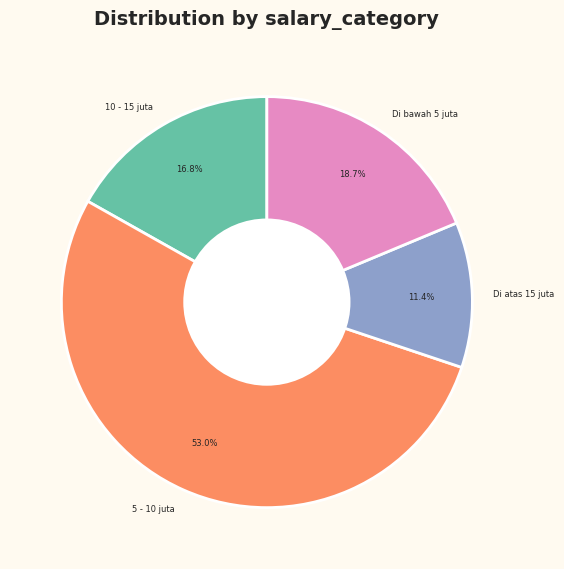

In [ ]:
pie_chart(df, 'salary_category')

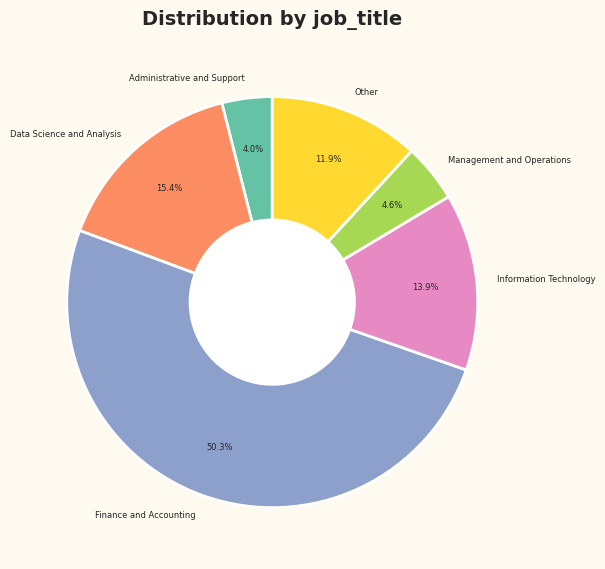

In [ ]:
pie_chart(df, 'job_title')

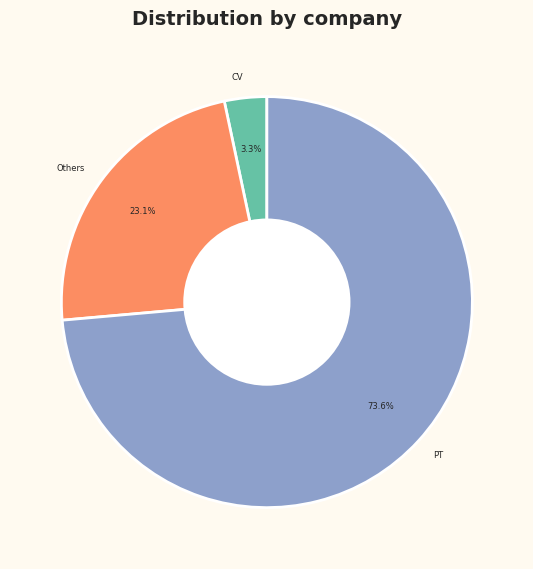

In [ ]:
pie_chart(df, 'company')

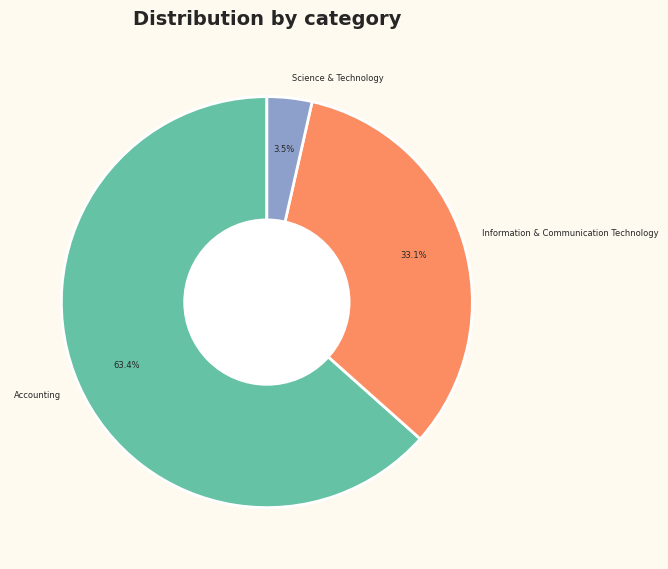

In [ ]:
pie_chart(df, 'category')

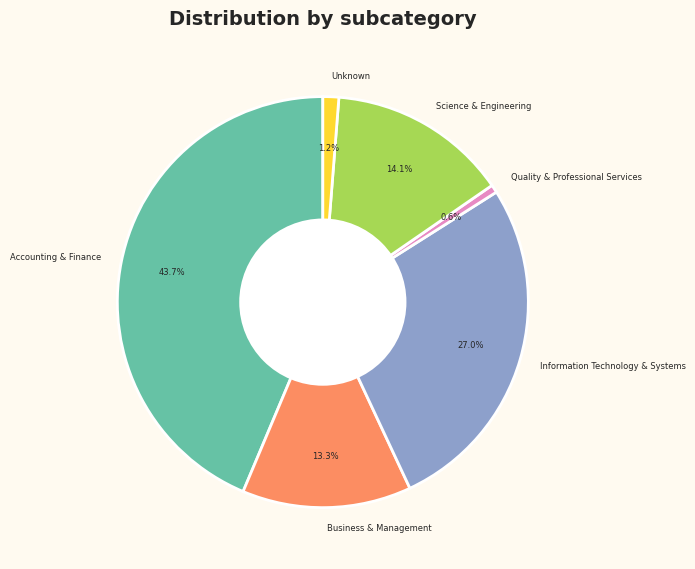

In [ ]:
pie_chart(df, 'subcategory')

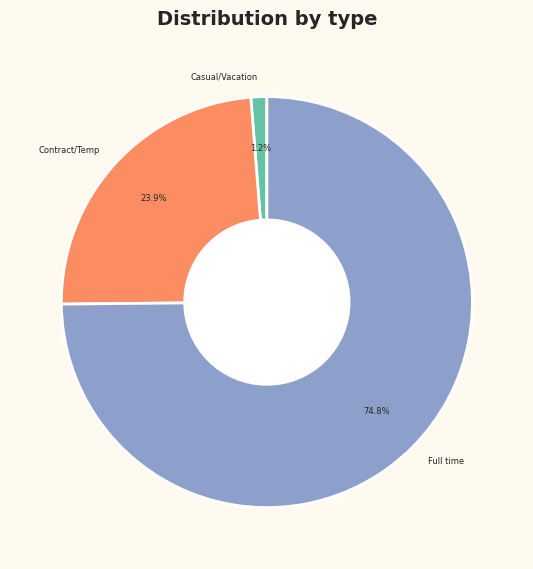

In [ ]:
pie_chart(df, 'type')

### Histogram

In [ ]:
def hist(df, col):
    # Check if the column exists in the DataFrame
    if col not in df.columns:
        raise KeyError(f"Column '{col}' not found in DataFrame.")

    # Ensure the figure size is appropriate
    plt.figure(figsize=(13.5, 6))

    sns.histplot(x=col, data=df, kde=True, palette='Set2')

    # Configure the x-axis to display integer values and center-align the labels
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.xticks(rotation=90, ha='center', fontsize=10)  # Rotate x-axis labels by 90 degrees and set smaller font size

    plt.title(f"Distribution by {col}", fontweight="black", size=10, pad=10)

    plt.tight_layout()
    plt.show()


<ipython-input-51-fb6bb7952cb9>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=df, kde=True, palette='Set2')


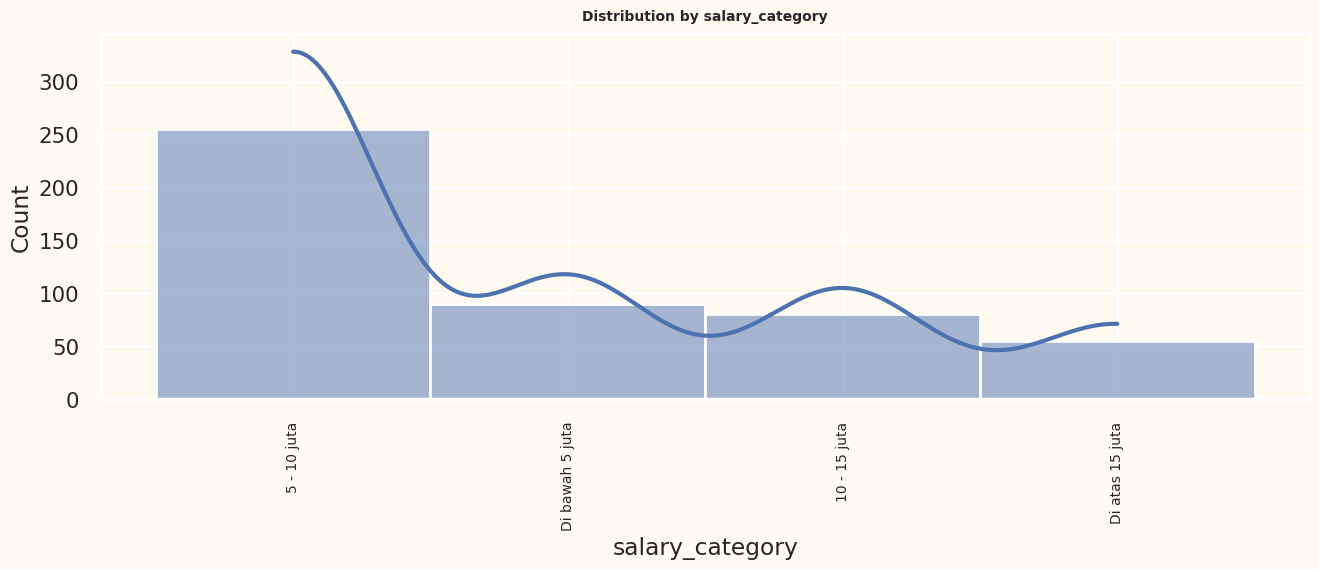

In [ ]:
hist(df, 'salary_category')

<ipython-input-51-fb6bb7952cb9>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=df, kde=True, palette='Set2')


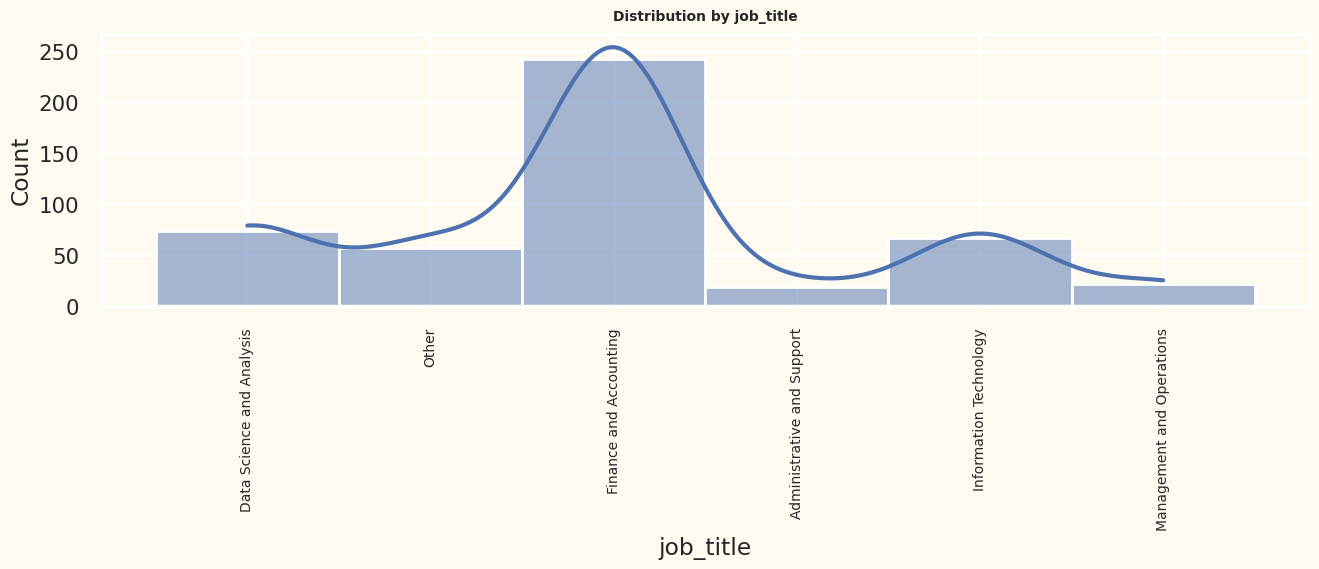

In [ ]:
hist(df, 'job_title')

<ipython-input-51-fb6bb7952cb9>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=df, kde=True, palette='Set2')


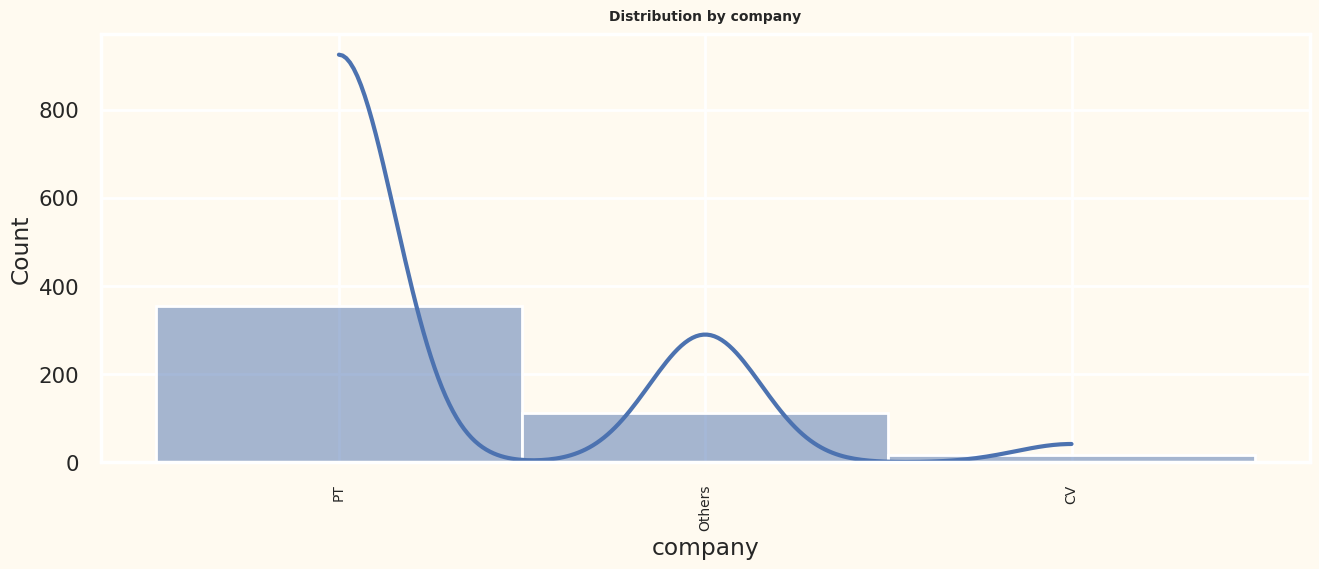

In [ ]:
hist(df, 'company')

<ipython-input-51-fb6bb7952cb9>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=df, kde=True, palette='Set2')


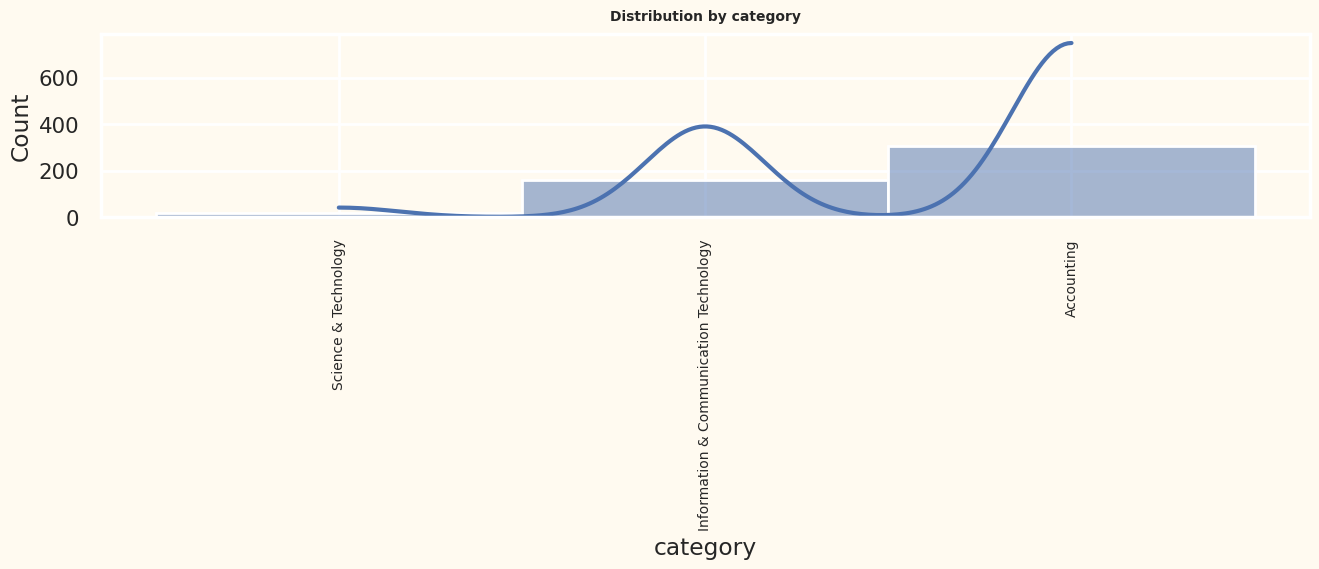

In [ ]:
hist(df, 'category')

<ipython-input-51-fb6bb7952cb9>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=df, kde=True, palette='Set2')


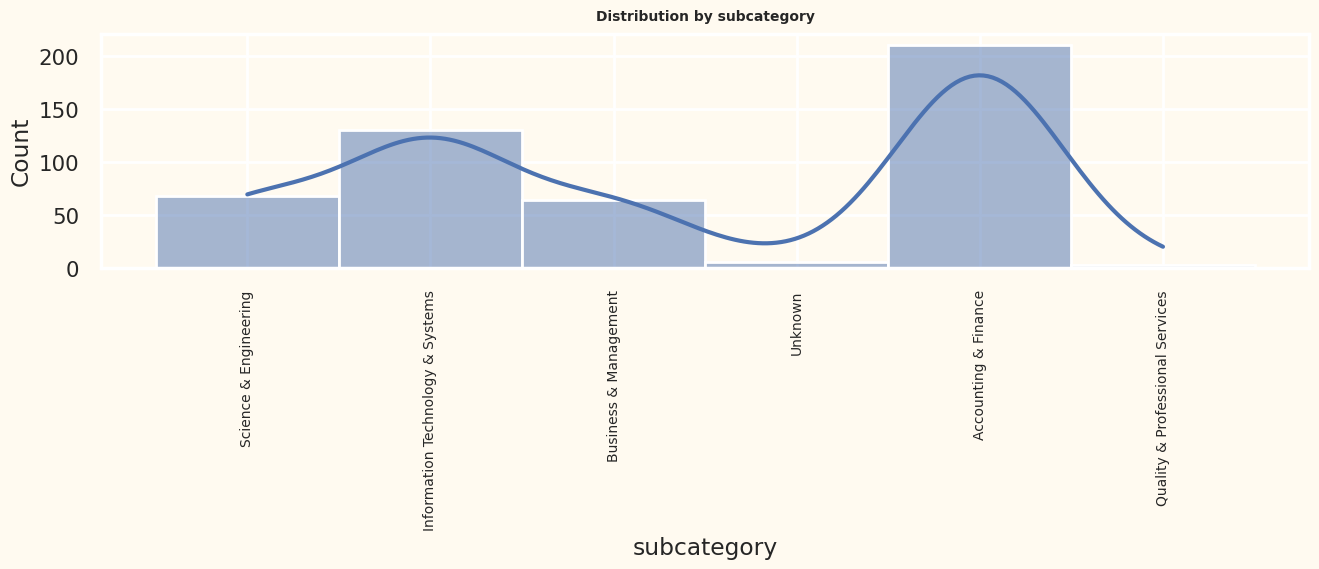

In [ ]:
hist(df, 'subcategory')

<ipython-input-51-fb6bb7952cb9>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=df, kde=True, palette='Set2')


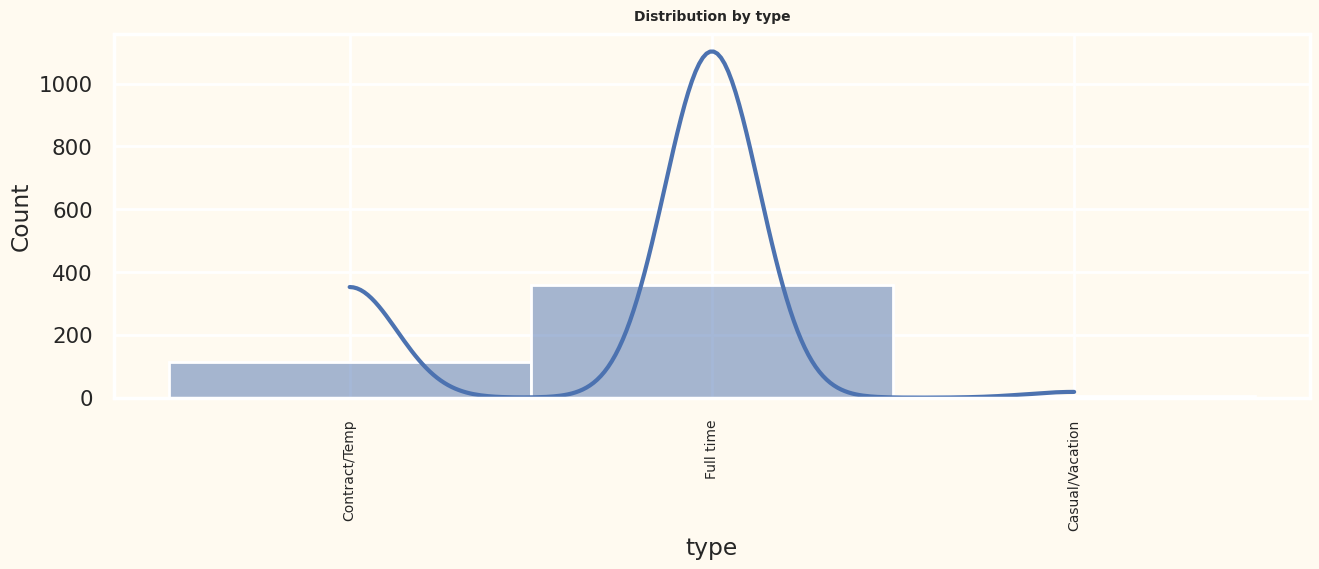

In [ ]:
hist(df, 'type')

### Bar chart


In [ ]:
def barplot(df, col, salary_col):
    # Check if the columns exist in the DataFrame
    if col not in df.columns:
        raise KeyError(f"Column '{col}' not found in DataFrame.")
    if salary_col not in df.columns:
        raise KeyError(f"Column '{salary_col}' not found in DataFrame.")

    plt.figure(figsize=(13.5, 8))

    # Calculate sum of salary for each category in col
    sum_salary_by_col = df.groupby(col)[salary_col].sum().sort_values(ascending=False)

    sns.barplot(x=sum_salary_by_col.index, y=sum_salary_by_col.values, palette='Set2')
    plt.title(f"{col} by Total {salary_col}", fontweight="black", size=14, pad=15)

    for index, value in enumerate(sum_salary_by_col.values):
        plt.text(index, value, f"{value:,.2f}", ha="center", va="bottom", size=10)

    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel(col, fontsize=12)
    plt.ylabel(f'Total {salary_col}', fontsize=12)

    # Disable scientific notation on y-axis
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

    plt.tight_layout()
    plt.show()

<ipython-input-58-16936a3eeb41>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sum_salary_by_col.index, y=sum_salary_by_col.values, palette='Set2')


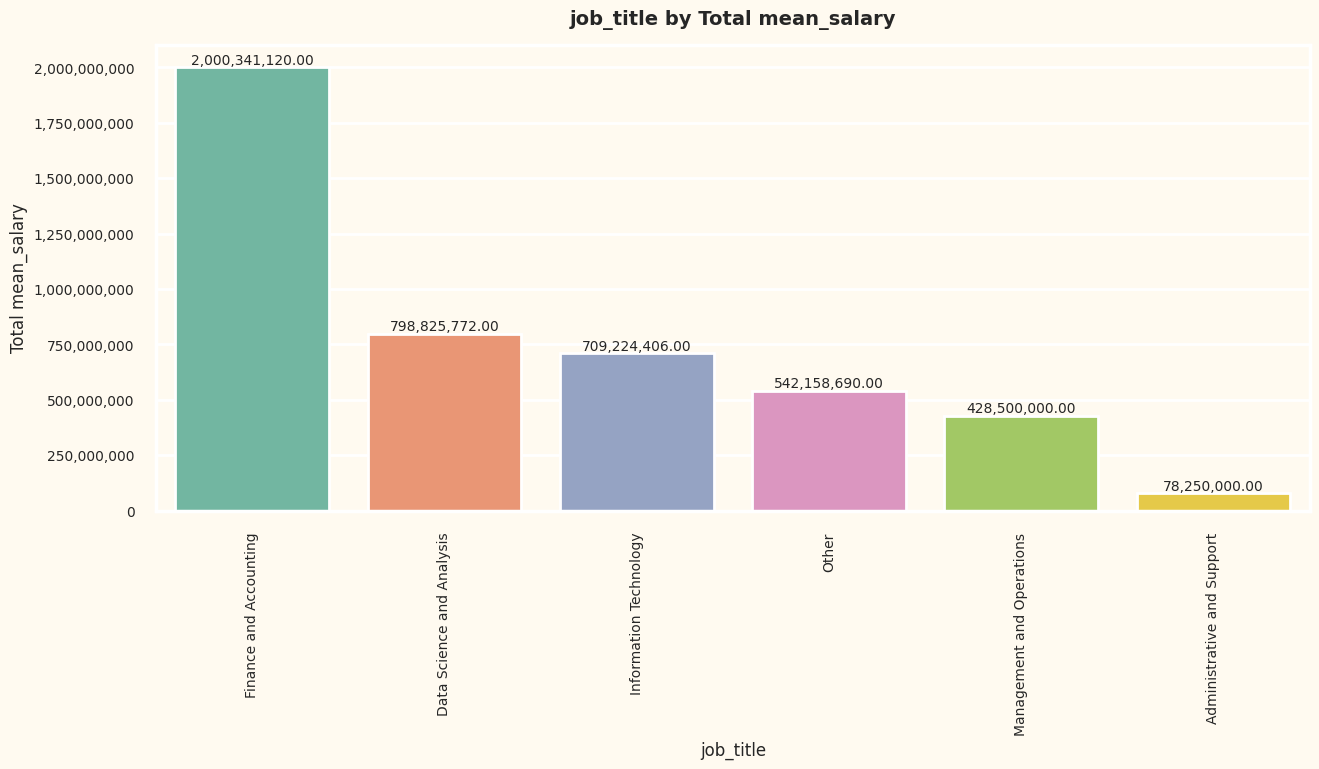

In [ ]:
barplot(df, 'job_title', 'mean_salary')

<ipython-input-58-16936a3eeb41>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sum_salary_by_col.index, y=sum_salary_by_col.values, palette='Set2')


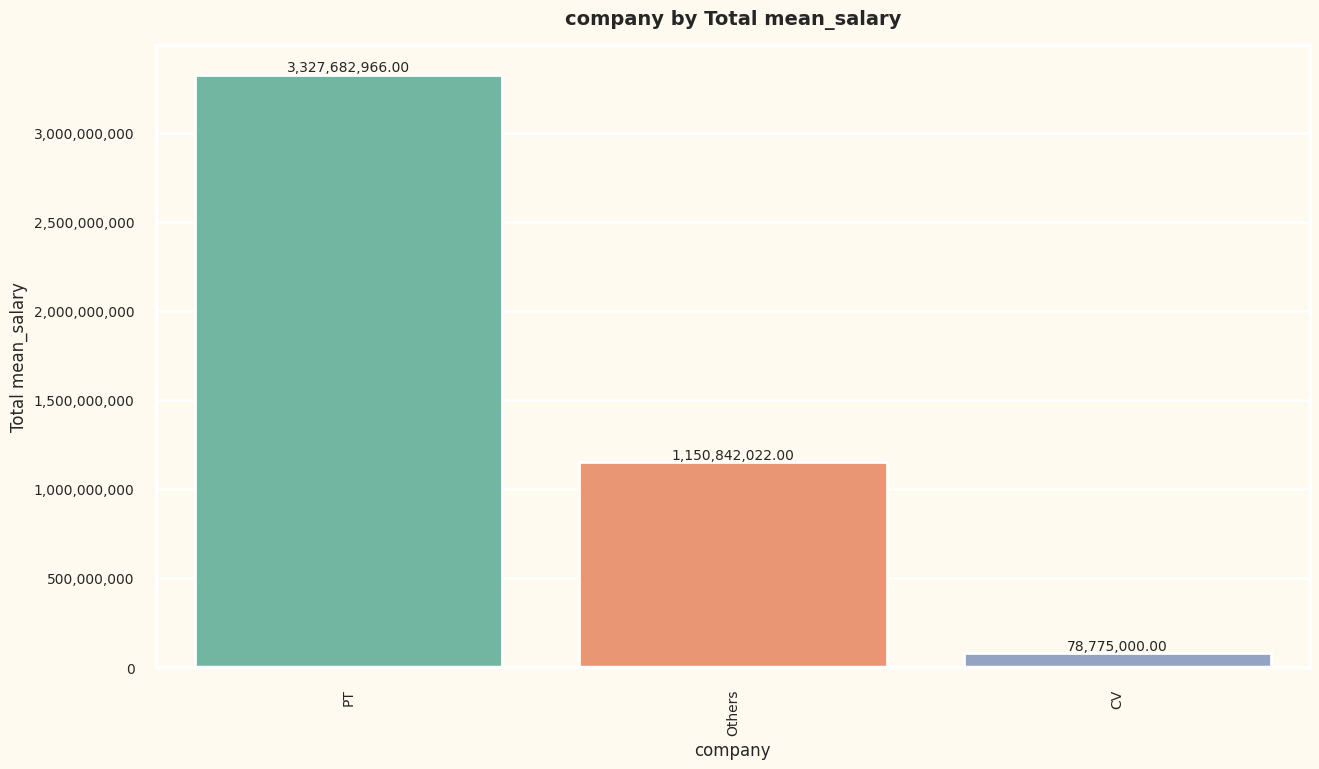

In [ ]:
barplot(df, 'company', 'mean_salary')

<ipython-input-58-16936a3eeb41>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sum_salary_by_col.index, y=sum_salary_by_col.values, palette='Set2')


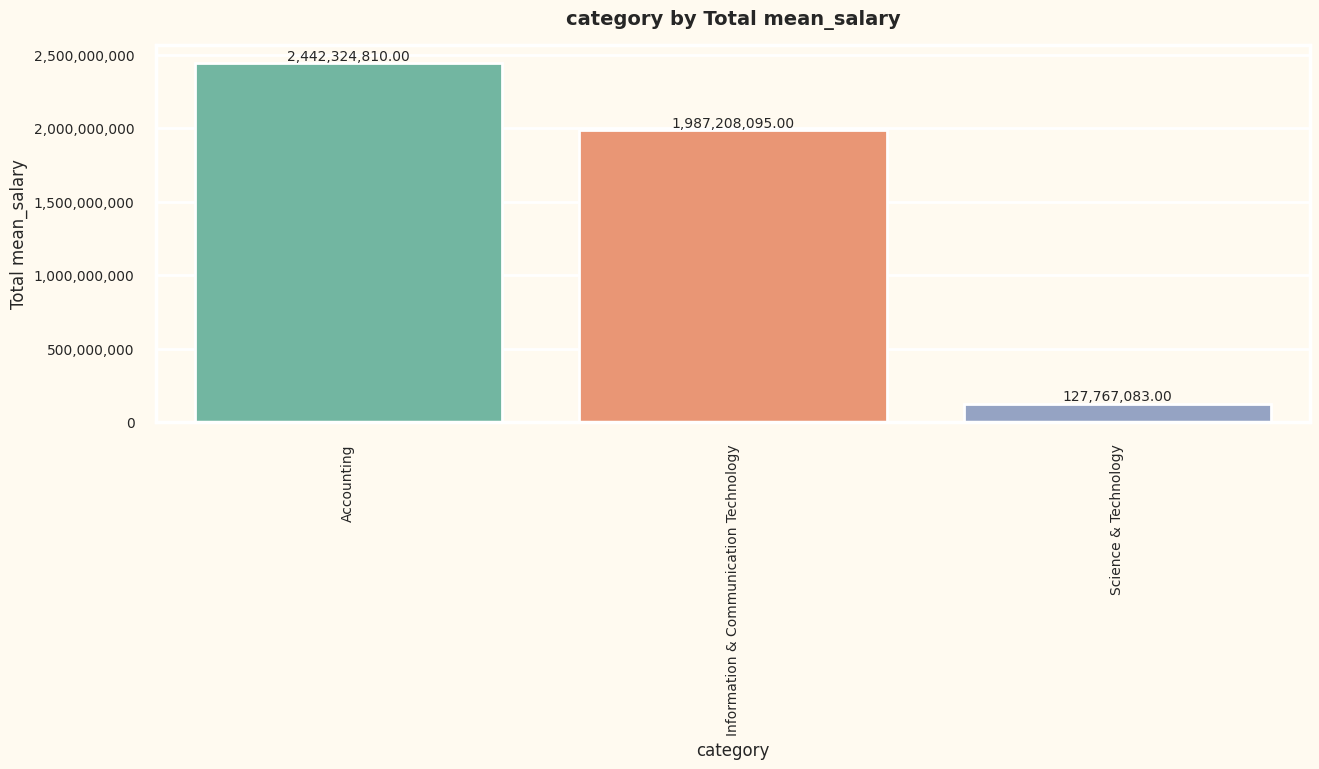

In [ ]:
barplot(df, 'category', 'mean_salary')

<ipython-input-58-16936a3eeb41>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sum_salary_by_col.index, y=sum_salary_by_col.values, palette='Set2')


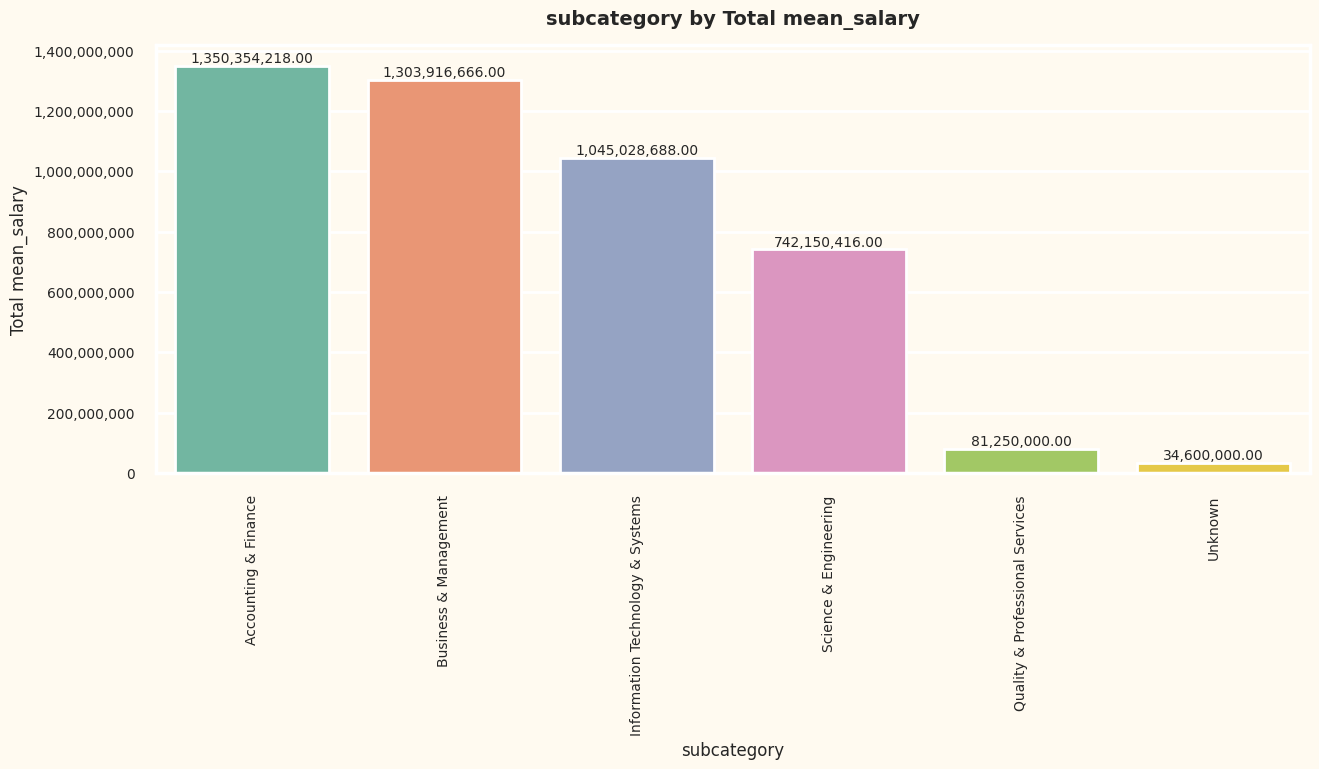

In [ ]:
barplot(df, 'subcategory', 'mean_salary')

<ipython-input-58-16936a3eeb41>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sum_salary_by_col.index, y=sum_salary_by_col.values, palette='Set2')


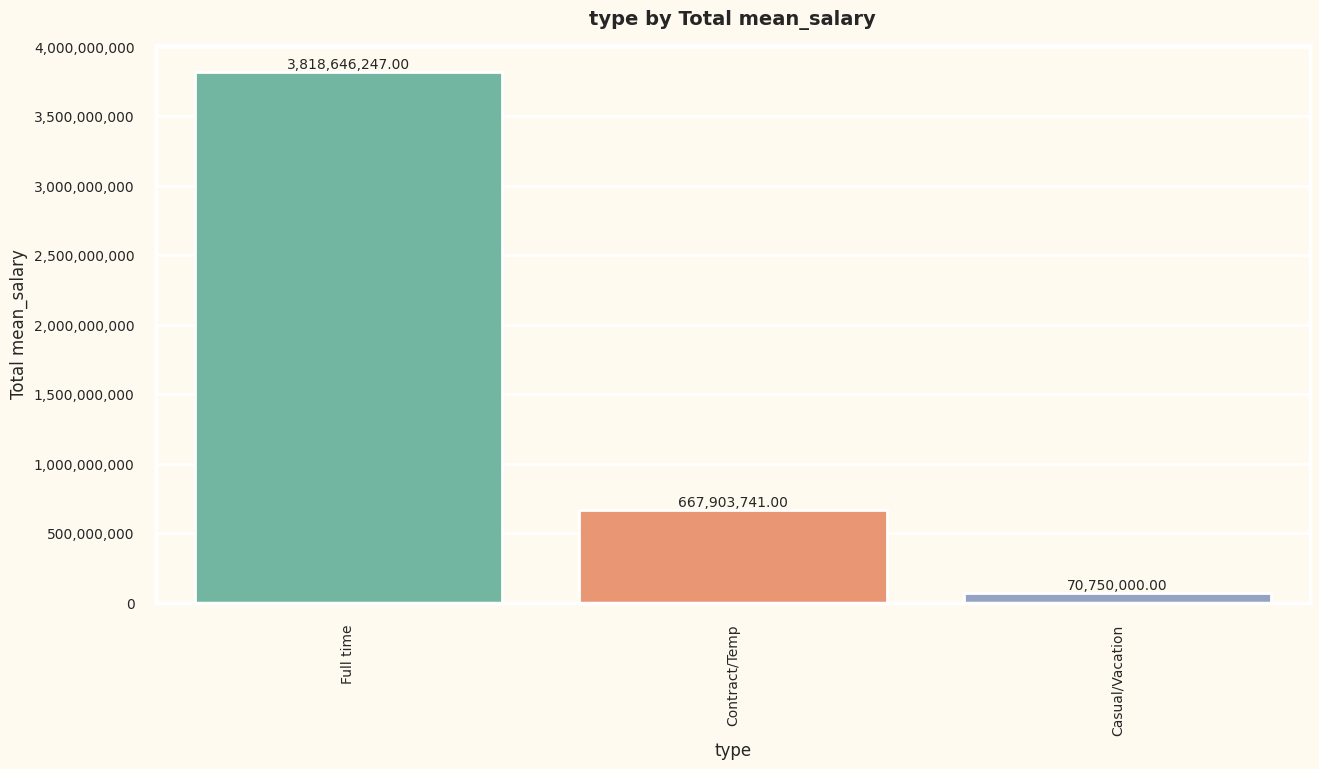

In [ ]:
barplot(df, 'type', 'mean_salary')

### Location

In [ ]:
import folium
from folium.plugins import HeatMap

map = folium.Map(location=[-2.4833826, 117.8902853], zoom_start=5)

# Convert latitude and longitude data into a list of points
heat_data = df[['Latitude', 'Longitude']].values.tolist()

# Add heatmap layer to the map
HeatMap(heat_data).add_to(map)

# Display the map
map

#**Modelling**

In [ ]:
df = pd.read_csv("/content/df_clean9.csv")

## Menghapus variabel yang tidak digunakan dalam modelling

In [ ]:
df.drop(["job_id", "mean_salary"], axis=1, inplace=True)
df.head(3)

,job_title,company,category,subcategory,type,Latitude,Longitude,salary_category
0,Data Science and Analysis,PT,Science & Technology,Science & Engineering,Contract/Temp,-6.161569,106.743891,5 - 10 juta
1,Data Science and Analysis,Others,Information & Communication Technology,Information Technology & Systems,Contract/Temp,-5.134296,119.412428,Di bawah 5 juta
2,Data Science and Analysis,Others,Information & Communication Technology,Business & Management,Full time,-6.176192,106.638216,5 - 10 juta


## Melakukan Encoding

In [ ]:
unique_salaries = df['salary_category'].unique()
print(unique_salaries)

['5 - 10 juta' 'Di bawah 5 juta' '10 - 15 juta' 'Di atas 15 juta']


In [ ]:
salary_mapping = {
    'Di bawah 5 juta': 0,
    '5 - 10 juta': 1,
    '10 - 15 juta': 1,
    'Di atas 15 juta': 2
}

df['salary_category'] = df['salary_category'].map(salary_mapping)

In [ ]:
df = pd.get_dummies(df, columns=['job_title','company', 'category', 'subcategory', 'type'])
df = df.replace({True: 1, False: 0})

In [ ]:
df.head(3)

,Latitude,Longitude,salary_category,job_title_Administrative and Support,job_title_Data Science and Analysis,job_title_Finance and Accounting,job_title_Information Technology,job_title_Management and Operations,job_title_Other,company_CV,...,category_Science & Technology,subcategory_Accounting & Finance,subcategory_Business & Management,subcategory_Information Technology & Systems,subcategory_Quality & Professional Services,subcategory_Science & Engineering,subcategory_Unknown,type_Casual/Vacation,type_Contract/Temp,type_Full time
0,-6.161569,106.743891,1,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1,-5.134296,119.412428,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,-6.176192,106.638216,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


##Split data

In [ ]:
X = df.drop(['salary_category'], axis=1)
y = df['salary_category']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape, X_test.shape

((384, 23), (97, 23))

In [ ]:
X_train.columns

Index(['Latitude', 'Longitude', 'job_title_Administrative and Support',
       'job_title_Data Science and Analysis',
       'job_title_Finance and Accounting', 'job_title_Information Technology',
       'job_title_Management and Operations', 'job_title_Other', 'company_CV',
       'company_Others', 'company_PT', 'category_Accounting',
       'category_Information & Communication Technology',
       'category_Science & Technology', 'subcategory_Accounting & Finance',
       'subcategory_Business & Management',
       'subcategory_Information Technology & Systems',
       'subcategory_Quality & Professional Services',
       'subcategory_Science & Engineering', 'subcategory_Unknown',
       'type_Casual/Vacation', 'type_Contract/Temp', 'type_Full time'],
      dtype='object')

In [ ]:
X_train_df = pd.DataFrame(X_train, columns=X_train.columns)
y_train_series = pd.Series(y_train, name=y_train.name)  # Set name for the series

# Concatenate
df_train = pd.concat([X_train_df, y_train_series], axis=1)

## Model SVM

### Hyperparameter Tunning

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [ ]:
svc = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear'],
    'class_weight' : ['balanced']
}

grid_search = GridSearchCV(svc, param_grid, refit=True, verbose=2, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gam

### Membangun Model

In [ ]:
svm_model = SVC(C=1, gamma=1, kernel='linear', class_weight = 'balanced')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [ ]:
svm_model

SVC(C=1, class_weight='balanced', gamma=1, kernel='linear')

### Cek Overfitting

In [ ]:
print('Training set score: {:.4f}'.format(svm_model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(svm_model.score(X_test, y_test)))

Training set score: 0.8047
Test set score: 0.8041


### Evaluasi Model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
y_pred = svm_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7216494845360825
Precision: 0.7990844174208145
Recall: 0.6033125371360666
F1-score: 0.6419790917769631


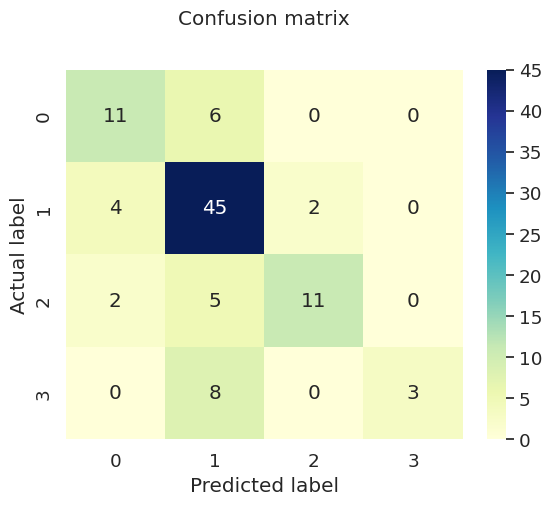

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Membuat confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix dengan Heatmap
sns.set(font_scale=1.2) # Untuk label yang lebih besar
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### Cek Faeture Important

In [ ]:
feature_names = df.columns[df.columns != 'salary_category']
coefficients = svm_model.coef_[0]
abs_coefficients = abs(coefficients)
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': abs_coefficients
})

feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

print(feature_importance_df.head(10))


                                         Feature  Importance
2           job_title_Administrative and Support    2.056526
6            job_title_Management and Operations    1.913297
14              subcategory_Accounting & Finance    1.586822
22                                type_Full time    1.345310
21                            type_Contract/Temp    0.694624
20                          type_Casual/Vacation    0.650686
15             subcategory_Business & Management    0.492011
17   subcategory_Quality & Professional Services    0.457243
16  subcategory_Information Technology & Systems    0.413530
19                           subcategory_Unknown    0.224038


## Catboost Classifier

In [ ]:
pip install catboost

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

In [ ]:
catboost = CatBoostClassifier(silent=True)

param_grid = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'iterations': [100, 200, 500]
}

grid_search = GridSearchCV(catboost, param_grid, refit=True, verbose=2, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ........depth=4, iterations=100, learning_rate=0.01; total time=   0.5s
[CV] END ........depth=4, iterations=100, learning_rate=0.01; total time=   0.4s
[CV] END ........depth=4, iterations=100, learning_rate=0.01; total time=   0.4s
[CV] END ........depth=4, iterations=100, learning_rate=0.01; total time=   0.3s
[CV] END ........depth=4, iterations=100, learning_rate=0.01; total time=   0.3s
[CV] END .........depth=4, iterations=100, learning_rate=0.1; total time=   0.2s
[CV] END .........depth=4, iterations=100, learning_rate=0.1; total time=   0.3s
[CV] END .........depth=4, iterations=100, learning_rate=0.1; total time=   0.3s
[CV] END .........depth=4, iterations=100, learning_rate=0.1; total time=   0.5s
[CV] END .........depth=4, iterations=100, learning_rate=0.1; total time=   0.3s
[CV] END .........depth=4, iterations=100, learning_rate=0.2; total time=   0.3s
[CV] END .........depth=4, iterations=100, lear

### Membangun Model

In [ ]:
catboost_model = CatBoostClassifier(depth=4, iterations=100, learning_rate=0.1, class_weights = [5.35, 1.43, 8.77])
catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)

0:	learn: 1.0174009	total: 3.82ms	remaining: 379ms
1:	learn: 0.9691158	total: 8.81ms	remaining: 432ms
2:	learn: 0.9204061	total: 15.2ms	remaining: 493ms
3:	learn: 0.8899210	total: 16.1ms	remaining: 385ms
4:	learn: 0.8533937	total: 16.8ms	remaining: 320ms
5:	learn: 0.8251601	total: 22.8ms	remaining: 357ms
6:	learn: 0.7965170	total: 23.6ms	remaining: 313ms
7:	learn: 0.7698379	total: 24.4ms	remaining: 280ms
8:	learn: 0.7458476	total: 30.5ms	remaining: 308ms
9:	learn: 0.7233817	total: 31.3ms	remaining: 281ms
10:	learn: 0.7074963	total: 32ms	remaining: 259ms
11:	learn: 0.6923663	total: 38.3ms	remaining: 281ms
12:	learn: 0.6805498	total: 39.1ms	remaining: 262ms
13:	learn: 0.6658977	total: 39.9ms	remaining: 245ms
14:	learn: 0.6600776	total: 46.3ms	remaining: 262ms
15:	learn: 0.6469269	total: 47.1ms	remaining: 247ms
16:	learn: 0.6338764	total: 47.8ms	remaining: 233ms
17:	learn: 0.6295957	total: 50.8ms	remaining: 232ms
18:	learn: 0.6236529	total: 54.6ms	remaining: 233ms
19:	learn: 0.6150006	tot

In [ ]:
catboost_model = CatBoostClassifier(depth=4, iterations=100, learning_rate=0.1,
                                    class_weights = [5.35, 1.43, 8.77])
catboost_model.fit(X_train, y_train)
catboost_model

### Cek Overfitting

In [ ]:
print('Training set score: {:.4f}'.format(catboost_model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(catboost_model.score(X_test, y_test)))

Training set score: 0.8151
Test set score: 0.8247


### Evaluasi Model

In [ ]:
y_pred = catboost_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7422680412371134
Precision: 0.7846095334685599
Recall: 0.6755793226381461
F1-score: 0.7119535887749595


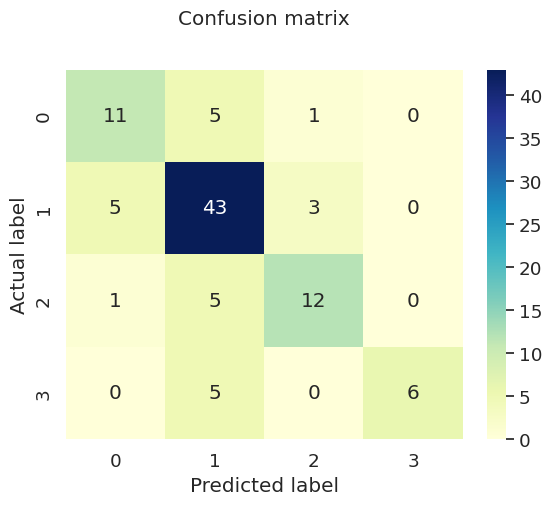

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Membuat confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix dengan Heatmap
sns.set(font_scale=1.2) # Untuk label yang lebih besar
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### Cek Features Important

In [ ]:
feature_names = df.columns[df.columns != 'salary_category']

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': catboost_model.feature_importances_
})

feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

print(feature_importance_df.head(10))



                                            Feature  Importance
18                subcategory_Science & Engineering   14.422837
15                subcategory_Business & Management   13.254403
22                                   type_Full time   12.065594
14                 subcategory_Accounting & Finance   11.993294
1                                         Longitude    9.707140
16     subcategory_Information Technology & Systems    7.646368
0                                          Latitude    7.379374
21                               type_Contract/Temp    6.703420
12  category_Information & Communication Technology    3.314850
3               job_title_Data Science and Analysis    2.084058
